# Asg-5 imports 


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4935, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 4935 (delta 176), reused 199 (delta 82), pack-reused 4634
Receiving objects: 100% (4935/4935), 7.58 MiB | 17.68 MiB/s, done.
Resolving deltas: 100% (3181/3181), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

 "help(AnimatePDA)" gives you info on how to use animations with PDA 


## Question 1: 
 

Prove that this language is not regular 

$L_{if} = \{ a^i b^j c^k \;:\; i,j,k\ge 0,\; {\rm and}\; {\rm if}\; (i=2)\; {\rm then}\; (j=k)  \}$

Hint: Consider the reverse of $L_{if}$ calling it the language $LR_{if}$, prove that $LR_{if}$ is non-regular using the Pumping Lemma. Then, justify why this means that $L_{if}$ is non-regular.


- Answer:

## Question 2:

Prove that language $Add$ is not regular 

Add = {x = y + z where x, y, and z are binary numbers and the addition yields correct result}
          
More examples of strings in the language $Add$ are below:

* String s1 = "$101=10+11$" 

* String s2 = "$1000 = 100 + 100$"

* String s3 = "$1011 = 110 + 101$"

- Answer:

## Question 3:

Design a PDA called "a2b" for the language $\{a^i b^j : i,j\ge 0, {\rm and}\; j = 2i \}$.
- Some strings in such language are: $abb$, $aabbbb$, $aaabbbbbb$, etc.
- Put a "header block" of comments (before you list the PDA transitions) that describes the overall stacking strategy. For example:
  - !! The PDA uses the stack in THIS WAY while a's arrive
  - !! Then when b's arrive, the PDA does THIS
  - !! After b's, if $a$'s arrive, the PDA does THIS
- After that, fully document your design (line by line)
- Then, test your PDA on these strings
  1. $\varepsilon$ (accept)

  2. $abb$ (accept)

  3. $aabbbb$ (accept)

  4. $aaabbbbbb$ (accept)

  5. $ab$ (reject)

  6. $b$ (reject)

  7. $aba$ (reject)

  8. $abba$ (reject)
- Finally, add two more accepting and two more rejecting tests of your own.

### Given test cases:

In [16]:
a2b = md2mc('''
PDA

!! Overall Algorithm:
!! When it comes to seeing a inputs, the stack places two 'a's onto the stack.  The idea is that if we're supposed to see twice as many b's as a's, then by placing 2 a's
!!  on the stack instead of one for every 'a' seen, all we need to do when we see a b is take one of the a's off of the stack.  If there's the right amount, the last b 
!!  should leave # as the only thing on the stack.
!! Whenever the stack sees a 'b', and the top of the stack has an 'a', the stack removes the 'a' from the top.  If all that's left on the stack is # and there are more 'b' 
!!  characters left to process, the PDA fails because it only stays on the final state if a 'b' removes an 'a' from the stack.
!! If the stack sees 'a' after seeing a 'b', 


!! Now a line-by-line description

IF : a, # ; aa# -> A    !! If see an a, place two on the stack and transition to the A stage

A  : a, a ; aaa -> A    !! If see more a's, keep adding two a's for everyone seen to the stack
A  : b, a ; ''  -> B    !! If see a b, take off 1 a and transition to B

B  : b, a ; ''  -> B    !! For every b, take one a off of the stack if there is still one available at the top
B  : '', #; ''  -> IF   !! If nothing left to process and # is all that remains on the stack, transition back to the IF because this is an accepted input

''')

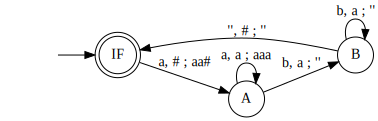

In [17]:
dotObj_pda(a2b)

In [18]:
explore_pda('', a2b)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


In [19]:
explore_pda('abb', a2b)

String abb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '')
Reached as follows:
->  ('IF', 'abb', '#')
->  ('A', 'bb', 'aa#')
->  ('B', 'b', 'a#')
->  ('B', '', '#')
->  ('IF', '', '') .


In [20]:
explore_pda('aabbbb', a2b)

String aabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '')
Reached as follows:
->  ('IF', 'aabbbb', '#')
->  ('A', 'abbbb', 'aa#')
->  ('A', 'bbbb', 'aaaa#')
->  ('B', 'bbb', 'aaa#')
->  ('B', 'bb', 'aa#')
->  ('B', 'b', 'a#')
->  ('B', '', '#')
->  ('IF', '', '') .


In [21]:
explore_pda('aaabbbbbb', a2b)

String aaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '')
Reached as follows:
->  ('IF', 'aaabbbbbb', '#')
->  ('A', 'aabbbbbb', 'aa#')
->  ('A', 'abbbbbb', 'aaaa#')
->  ('A', 'bbbbbb', 'aaaaaa#')
->  ('B', 'bbbbb', 'aaaaa#')
->  ('B', 'bbbb', 'aaaa#')
->  ('B', 'bbb', 'aaa#')
->  ('B', 'bb', 'aa#')
->  ('B', 'b', 'a#')
->  ('B', '', '#')
->  ('IF', '', '') .


In [22]:
explore_pda('ab', a2b)

String ab rejected by your PDA :-(
Visited states are:
{('A', 'b', 'aa#'), ('IF', 'ab', '#'), ('B', '', 'a#')}


In [23]:
explore_pda('b', a2b)

String b rejected by your PDA :-(
Visited states are:
{('IF', 'b', '#')}


In [24]:
explore_pda('aba', a2b)

String aba rejected by your PDA :-(
Visited states are:
{('IF', 'aba', '#'), ('B', 'a', 'a#'), ('A', 'ba', 'aa#')}


In [25]:
explore_pda('abba', a2b)

String abba rejected by your PDA :-(
Visited states are:
{('B', 'a', '#'), ('IF', 'a', ''), ('B', 'ba', 'a#'), ('A', 'bba', 'aa#'), ('IF', 'abba', '#')}


### Add your own test cases here:

In [26]:
# Accepting test case 1:
explore_pda('aaaabbbbbbbb', a2b)

String aaaabbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '')
Reached as follows:
->  ('IF', 'aaaabbbbbbbb', '#')
->  ('A', 'aaabbbbbbbb', 'aa#')
->  ('A', 'aabbbbbbbb', 'aaaa#')
->  ('A', 'abbbbbbbb', 'aaaaaa#')
->  ('A', 'bbbbbbbb', 'aaaaaaaa#')
->  ('B', 'bbbbbbb', 'aaaaaaa#')
->  ('B', 'bbbbbb', 'aaaaaa#')
->  ('B', 'bbbbb', 'aaaaa#')
->  ('B', 'bbbb', 'aaaa#')
->  ('B', 'bbb', 'aaa#')
->  ('B', 'bb', 'aa#')
->  ('B', 'b', 'a#')
->  ('B', '', '#')
->  ('IF', '', '') .


In [27]:
# Accepting test case 2:
explore_pda('aaaaaaaaaabbbbbbbbbbbbbbbbbbbb', a2b)

String aaaaaaaaaabbbbbbbbbbbbbbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '')
Reached as follows:
->  ('IF', 'aaaaaaaaaabbbbbbbbbbbbbbbbbbbb', '#')
->  ('A', 'aaaaaaaaabbbbbbbbbbbbbbbbbbbb', 'aa#')
->  ('A', 'aaaaaaaabbbbbbbbbbbbbbbbbbbb', 'aaaa#')
->  ('A', 'aaaaaaabbbbbbbbbbbbbbbbbbbb', 'aaaaaa#')
->  ('A', 'aaaaaabbbbbbbbbbbbbbbbbbbb', 'aaaaaaaa#')
->  ('A', 'aaaaabbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaa#')
->  ('A', 'aaaabbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaa#')
->  ('A', 'aaabbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaa#')
->  ('A', 'aabbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaa#')
->  ('A', 'abbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaaaa#')
->  ('A', 'bbbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaaaaaa#')
->  ('B', 'bbbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaaaaa#')
->  ('B', 'bbbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaaaa#')
->  ('B', 'bbbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaaa#')
->  ('B', 'bbbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaaa#')
->  ('B', 'bbbbbbbbbbbbbbb', 'aaaaaaaaaaaaaaa#'

In [28]:
# Rejected test case 1:
explore_pda('aabbbab', a2b)

String aabbbab rejected by your PDA :-(
Visited states are:
{('A', 'abbbab', 'aa#'), ('B', 'ab', 'a#'), ('IF', 'aabbbab', '#'), ('B', 'bbab', 'aaa#'), ('A', 'bbbab', 'aaaa#'), ('B', 'bab', 'aa#')}


In [29]:
# Rejected test case 2:
explore_pda('bba', a2b)

String bba rejected by your PDA :-(
Visited states are:
{('IF', 'bba', '#')}


## Question 4:

Design a PDA for language Lif in question 1. 

- Hint: when a = 2, the PDA matches b's and c's (using the stack for this match). Else, it only checks their order of arrival (and simply ignores the stack).
- Test your PDA on these strings:
  - aabbbccc   (accept)
  - aabbbbcccc (accept)
  - aa         (accept)
  - abbbcccc (accept)
  - aaabbc   (accept)
  - Epsilon    (accept, as there are zero a's)
  - abbcc    (accept, as there is no constraint to not match b's and c's if two a's)
  - cb        (reject)
  - aabbcca (reject)
  - abba     (reject)
  - ccac       (reject)
  - abba       (reject)
  - baac       (reject)
  - ac         (accept)
- Then add three more accepting test cases and three more rejecting test cases. Document the tests saying why they must pass/fail

In [ ]:
Lif = md2mc('''
PDA

!! Overall Algorithm
!! ...


 
... Now a line-by-line description

I : a, # ; a# -> A

A : a, a# ; aa -> A2
A : b, #  ; b# -> B
A : b, a  ; ba -> B
A : '', a ; a  -> F

A2 : a, a ; aa -> A3
A2 : b, a ; ba -> B2


B : b, b ; b  -> B
B : c, b ; cb -> F
B : '', b ; b -> F

F : c, c ; c -> F

''')

In [ ]:
dotObj_pda(Lif)

### Given test cases:

* aa bbb ccc   (accept)

In [ ]:
explore_pda('aabbbccc', Lif)

* aa bbbb cccc (accept)
 

In [ ]:
explore_pda('aabbbbcccc', Lif)

* aa         (accept)

In [ ]:
explore_pda('aa', Lif)

* a bbb cccc (accept)

In [ ]:
explore_pda('abbbcccc', Lif)

* aaa bb c   (accept)

In [ ]:
explore_pda('aaabbc', Lif)

* Epsilon    (accept, as there are zero a's)

In [ ]:
explore_pda('', Lif)

* a bb cc    (accept, as there is no constraint to not match b's and c's if two a's)

In [ ]:
explore_pda('abbcc', Lif)

* b c must accept too

In [ ]:
explore_pda('bc', Lif)

* c b        (reject)

In [ ]:
explore_pda('cb', Lif)

* aa bb cc a (reject)

In [ ]:
explore_pda('aabbcca', Lif)

* a bb a     (reject)

In [ ]:
explore_pda('abba', Lif)

* ccac       (reject)

In [ ]:
explore_pda('ccac', Lif)

* abba       (reject)

In [ ]:
explore_pda('abba', Lif)

* baac       (reject)

In [ ]:
explore_pda('baac', Lif)

* ac         (accept), as there are no b's  

In [ ]:
explore_pda('ac', Lif)

* acb (reject)

In [ ]:
explore_pda('acb', Lif)

### Add your test cases below:

# END
